<a href="https://colab.research.google.com/github/raulbenitez/postgrau_IML_exploratory/blob/master/EJERCICIO_WALMART/Ejercicio_Walmart_FabianM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading data and loading libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv ('https://raw.githubusercontent.com/plotly/datasets/master/1962_2006_walmart_store_openings.csv')

df.head()

,storenum,OPENDATE,date_super,conversion,st,county,STREETADDR,STRCITY,STRSTATE,ZIPCODE,type_store,LAT,LON,MONTH,DAY,YEAR
0,1,7/1/62,3/1/97,1.0,5,7,2110 WEST WALNUT,Rogers,AR,72756,Supercenter,36.342235,-94.07141,7,1,1962
1,2,8/1/64,3/1/96,1.0,5,9,1417 HWY 62/65 N,Harrison,AR,72601,Supercenter,36.236984,-93.09345,8,1,1964
2,4,8/1/65,3/1/02,1.0,5,7,2901 HWY 412 EAST,Siloam Springs,AR,72761,Supercenter,36.179905,-94.50208,8,1,1965
3,8,10/1/67,3/1/93,1.0,5,29,1621 NORTH BUSINESS 9,Morrilton,AR,72110,Supercenter,35.156491,-92.75858,10,1,1967
4,7,10/1/67,NaN,NaN,5,119,3801 CAMP ROBINSON RD.,North Little Rock,AR,72118,Wal-Mart,34.813269,-92.30229,10,1,1967


In [ ]:
df.columns

Index(['storenum', 'OPENDATE', 'date_super', 'conversion', 'st', 'county',
       'STREETADDR', 'STRCITY', 'STRSTATE', 'ZIPCODE', 'type_store', 'LAT',
       'LON', 'MONTH', 'DAY', 'YEAR'],
      dtype='object')

In [ ]:
df.describe()

,storenum,conversion,st,county,ZIPCODE,LAT,LON,MONTH,DAY,YEAR
count,2992.000000,1946.000000,2992.000000,2992.000000,2992.000000,2992.000000,2992.000000,2992.000000,2992.000000,2992.000000
mean,1809.838235,0.800103,28.956217,101.030414,54077.080882,36.803160,-91.582521,6.432487,15.108623,1990.793783
std,1362.727189,0.400026,16.061538,105.534836,23652.129967,4.818443,12.051487,3.492092,10.999463,8.572069
min,1.000000,0.000000,1.000000,1.000000,10547.000000,25.431506,-124.210860,1.000000,1.000000,1962.000000
25%,777.750000,1.000000,16.000000,37.000000,33522.000000,33.415925,-96.681565,3.000000,3.000000,1985.000000
50%,1540.500000,1.000000,29.000000,77.000000,52648.000000,36.753618,-88.955250,7.000000,16.000000,1990.000000
75%,2534.250000,1.000000,45.000000,125.000000,75061.500000,40.409729,-82.619280,10.000000,26.000000,1998.000000
max,5498.000000,1.000000,56.000000,840.000000,99352.000000,48.759079,-72.637078,12.000000,31.000000,2006.000000


In [ ]:
df.shape

(2992, 16)

In [ ]:
df.dtypes

storenum        int64
OPENDATE       object
date_super     object
conversion    float64
st              int64
county          int64
STREETADDR     object
STRCITY        object
STRSTATE       object
ZIPCODE         int64
type_store     object
LAT           float64
LON           float64
MONTH           int64
DAY             int64
YEAR            int64
dtype: object

In [ ]:
df.isnull().any()

storenum      False
OPENDATE      False
date_super     True
conversion     True
st            False
county        False
STREETADDR    False
STRCITY       False
STRSTATE      False
ZIPCODE       False
type_store    False
LAT           False
LON           False
MONTH         False
DAY           False
YEAR          False
dtype: bool

# Cleaning Data 

Removing N/A lines

In [ ]:
df1 = df.dropna()

In [ ]:
df1.shape

(1946, 16)

Selecting only columns with numbers

In [ ]:
df1_num = df1.select_dtypes (include = 'number')

In [ ]:
df1_num.shape

(1946, 10)

---
We went from 2992 lines / 16 columns datasets to 1946 lines / 10 columns by removing N/A and cleaning non-numerical data
---


---

# Dimensionality reduction and data visualization in reduced space

---



In [ ]:
df1_num.head()

,storenum,conversion,st,county,ZIPCODE,LAT,LON,MONTH,DAY,YEAR
0,1,1.0,5,7,72756,36.342235,-94.07141,7,1,1962
1,2,1.0,5,9,72601,36.236984,-93.09345,8,1,1964
2,4,1.0,5,7,72761,36.179905,-94.50208,8,1,1965
3,8,1.0,5,29,72110,35.156491,-92.75858,10,1,1967
5,10,1.0,40,21,74464,35.923658,-94.97185,7,1,1968


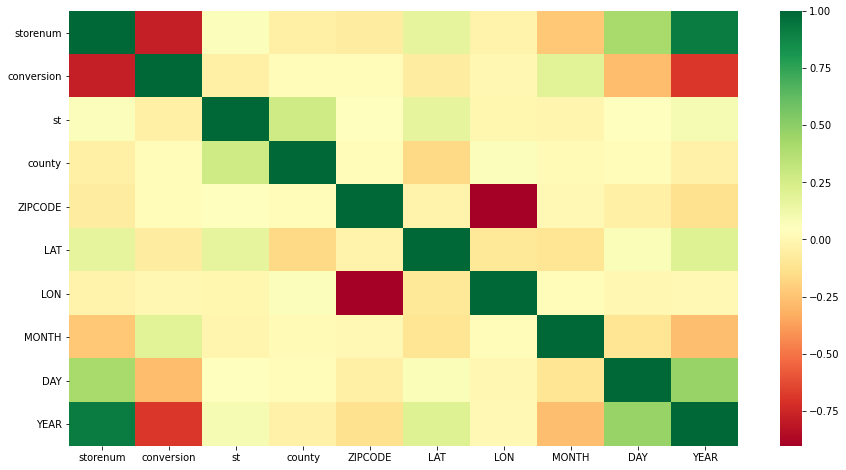

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df1_num.corr(),cmap="RdYlGn")

Original Data = (2992, 16)
Original Data without Naans = (1946, 10)
Acumulated explained Variance =[ 29.96540273  49.05169354  61.89097376  72.90042761  82.02558791
  89.77789524  95.62396707  98.57335388  99.39559842 100.        ]
Data Dimensionality in Reduced PCA Space = (1946, 6)


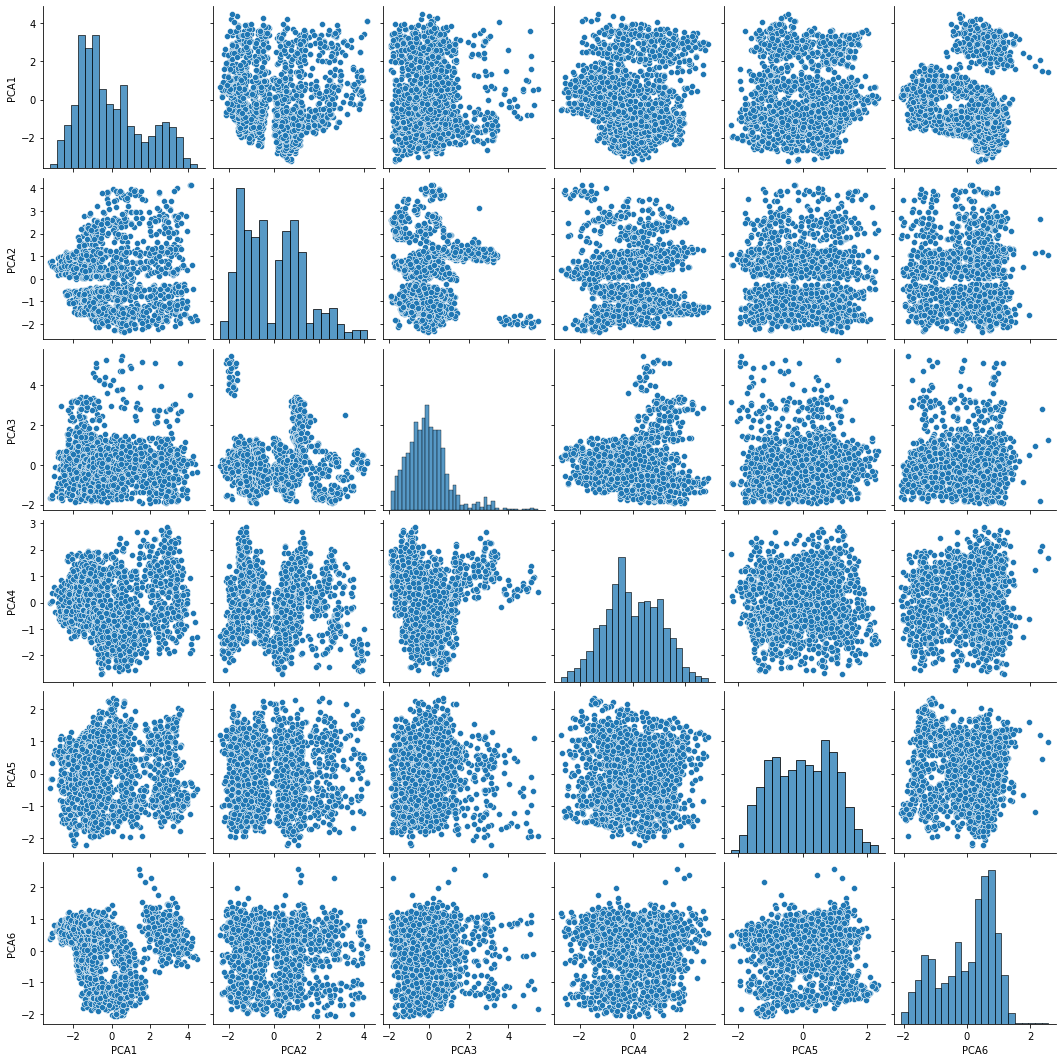

In [ ]:
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

print('Original Data = {}'.format(df.shape))
print('Original Data without Naans = {}'.format(df1_num.shape))

X = df1_num
y = df1_num['YEAR'] # use origin as class label (not needed in PCA)

# scale data:
from sklearn.preprocessing import StandardScaler
XS = StandardScaler().fit_transform(X)


# PCA decomopositon:
from sklearn import decomposition
n_variables = df1_num.shape[1]
pca = decomposition.PCA(n_components=n_variables).fit(XS)

# varianza explicada acumulada:
print('Acumulated explained Variance ={}'.format(100*pca.explained_variance_ratio_.cumsum()))

# project data into PCA space:
Xproj = pca.transform(XS)

# Reducir dimensionalidad de los datos quedandonos solamente con tres componentes PCA:
ndim_reducida = 6 # establecer dimensionalidad reducida a partir de la varianza explicada por cada componente
XPCA = Xproj[:,0:ndim_reducida]

print('Data Dimensionality in Reduced PCA Space = {}'.format(XPCA.shape))

d = pd.DataFrame(XPCA,columns=['PCA1', 'PCA2','PCA3','PCA4','PCA5','PCA6'])
sns.pairplot(d)
plt.show()

In [ ]:
pca.explained_variance_

array([2.99808091, 1.90961038, 1.28458814, 1.10151142, 0.91298519,
       0.77562931, 0.58490775, 0.29509032, 0.08226673, 0.06047123])

In [ ]:
100*pca.explained_variance_ratio_.cumsum()

array([ 29.96540273,  49.05169354,  61.89097376,  72.90042761,
        82.02558791,  89.77789524,  95.62396707,  98.57335388,
        99.39559842, 100.        ])

---
After PCA reduction, we went from a 1946 Lines / 10 columns Space down to 1946 lines / 6 columns explaining 89.78% of the variability 
---


In [ ]:
d.describe()

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6
count,1.946000e+03,1.946000e+03,1.946000e+03,1.946000e+03,1.946000e+03,1.946000e+03
mean,-1.718392e-16,3.423093e-18,-5.476948e-18,2.477178e-16,-2.715653e-17,-7.322922e-17
std,1.731497e+00,1.381887e+00,1.133397e+00,1.049529e+00,9.555026e-01,8.806982e-01
min,-3.215381e+00,-2.358972e+00,-1.922732e+00,-2.706911e+00,-2.223613e+00,-2.071629e+00
25%,-1.344715e+00,-1.226467e+00,-7.347501e-01,-7.320770e-01,-8.248768e-01,-6.672824e-01
50%,-5.174648e-01,-3.355470e-01,-1.211257e-01,-9.077864e-02,1.233253e-02,2.856833e-01
75%,1.034574e+00,9.846918e-01,5.048441e-01,8.053336e-01,7.701637e-01,6.995040e-01
max,4.499085e+00,4.156759e+00,5.472271e+00,2.847944e+00,2.330692e+00,2.564708e+00


---
# Clustering
---


In [ ]:
import numpy as np

Z = np.array(d)

In [ ]:
d.shape

(1946, 6)

Let's find how many cluster we aim to: 

[36732.95876676111]
[36732.95876676111, 34875.18353334532]
[36732.95876676111, 34875.18353334532, 34117.69903391703]
[36732.95876676111, 34875.18353334532, 34117.69903391703, 33495.50240813688]
[36732.95876676111, 34875.18353334532, 34117.69903391703, 33495.50240813688, 32003.241370813445]
[36732.95876676111, 34875.18353334532, 34117.69903391703, 33495.50240813688, 32003.241370813445, 32312.51568526563]
[36732.95876676111, 34875.18353334532, 34117.69903391703, 33495.50240813688, 32003.241370813445, 32312.51568526563, 31909.91620391968]
[36732.95876676111, 34875.18353334532, 34117.69903391703, 33495.50240813688, 32003.241370813445, 32312.51568526563, 31909.91620391968, 30977.479404748097]
[36732.95876676111, 34875.18353334532, 34117.69903391703, 33495.50240813688, 32003.241370813445, 32312.51568526563, 31909.91620391968, 30977.479404748097, 30624.54725428282]
[36732.95876676111, 34875.18353334532, 34117.69903391703, 33495.50240813688, 32003.241370813445, 32312.51568526563, 31909.9162039

<Figure size 864x432 with 0 Axes>

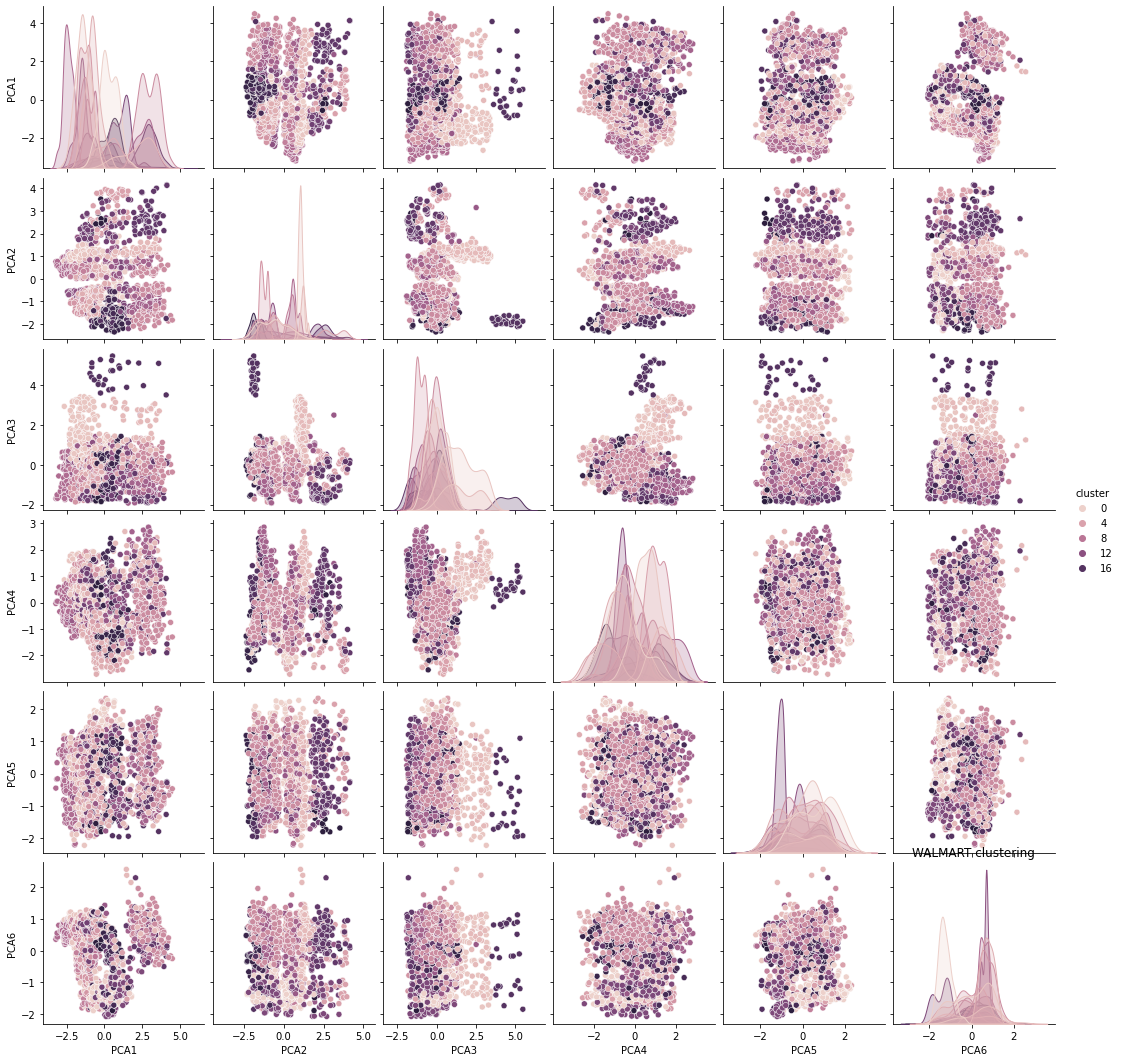

In [ ]:
from sklearn.datasets import make_blobs
import numpy as np
import seaborn as sns
from sklearn import mixture
import matplotlib.pyplot as plt


NMAX = 20
bic = []
for kG in np.arange(1,NMAX+1):
    gmm = mixture.GaussianMixture(n_components=kG,covariance_type='full').fit(Z)
    bic.append(gmm.bic(Z))
    print(bic)

idx_winner = np.argmin(bic)
print('...and the winner is WALMART model G = {}'.format(idx_winner+1))
gmm = mixture.GaussianMixture(n_components=idx_winner+1,covariance_type='full').fit(Z)

y_pred_gmm = gmm.fit_predict(Z)

d['cluster'] = y_pred_gmm

fig = plt.figure(figsize=(12,6))
sns.pairplot(d,hue='cluster')
plt.title("WALMART clustering")
plt.show()

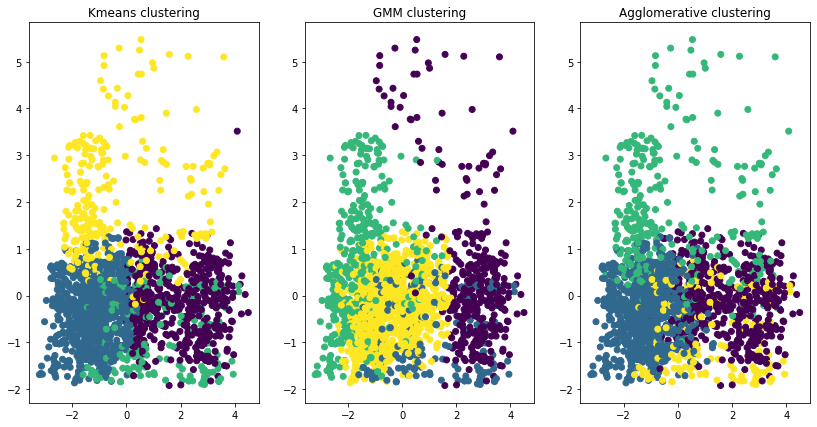

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn import mixture


# Kmeans clustering:
# Incorrect number of clusters
clust_kmeans = KMeans(n_clusters=4).fit_predict(d)

# Agglomerative clustering:
clust_agg = AgglomerativeClustering(n_clusters=4).fit_predict(d) 


# GMM clustering:
clust_gmm = mixture.GaussianMixture(n_components=4,covariance_type='full').fit_predict(d)

plt.figure(figsize=(14,7))

ax0 = plt.subplot(1,3,1)
plt.scatter(Z[:, 0], Z[:, 2], c=clust_kmeans)
plt.title("Kmeans clustering")

ax1 = plt.subplot(1,3,2)
plt.scatter(Z[:, 0], Z[:, 2], c=clust_gmm)
plt.title("GMM clustering")

ax2 = plt.subplot(1,3,3)
plt.scatter(Z[:, 0], Z[:, 2], c=clust_agg)
plt.title("Agglomerative clustering")
plt.show()

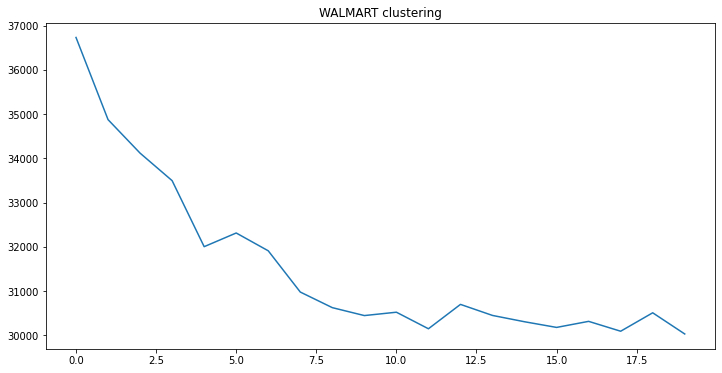

In [ ]:
fig = plt.figure(figsize=(12,6))
plt.plot(bic)
plt.title("WALMART clustering")
plt.show()